<font size=7> Seizure Slice 2  - plots

# Setup

In [1]:
from human_hip.raw_data import get_brain_waves
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.animation import FuncAnimation

import matplotlib.pyplot as plt
from braingeneers.analysis.analysis import SpikeData
from scipy.ndimage import gaussian_filter1d
import numpy as np

In [2]:
import pickle
from matplotlib import pyplot as plt
from human_hip.raw_data import get_brain_waves, cwt_spectrogram, spectrogram_plot, butter_filter
from human_hip.spike_data import read_autocurated_data, plot_raster
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

import pywt             # used by cwt_spectrogram

# Packages for plotting spectrogram
from scipy import ndimage
from matplotlib.colors import LogNorm #Normalize
from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import pickle 
from human_hip.histology import plot_histology, plot_histology_electrode_map
from human_hip.spike_data import read_phy_files, read_autocurated_data

from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

In [3]:
import pickle
from human_hip import spike_data
from matplotlib import pyplot as plt
from human_hip.raw_data import get_brain_waves
from human_hip.animate import animate_waves
from human_hip.spike_data import read_autocurated_data, plot_raster, read_phy_files

In [4]:
sd = spike_data.read_phy_files("/workspaces/human_hippocampus/data/ephys/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/elliott/elliott_chip21769_2.zip")


In [5]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/acid1_start25s_stop39s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
print(data_raw.keys())
print(data_raw["data"].shape)
xy = data_raw["xy"]

dict_keys(['data', 'xy', 'frame_rate', 'uuid', 'file'])
(894, 14000)


(<Axes: title={'center': 'Neural Population Firing Rate'}, xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

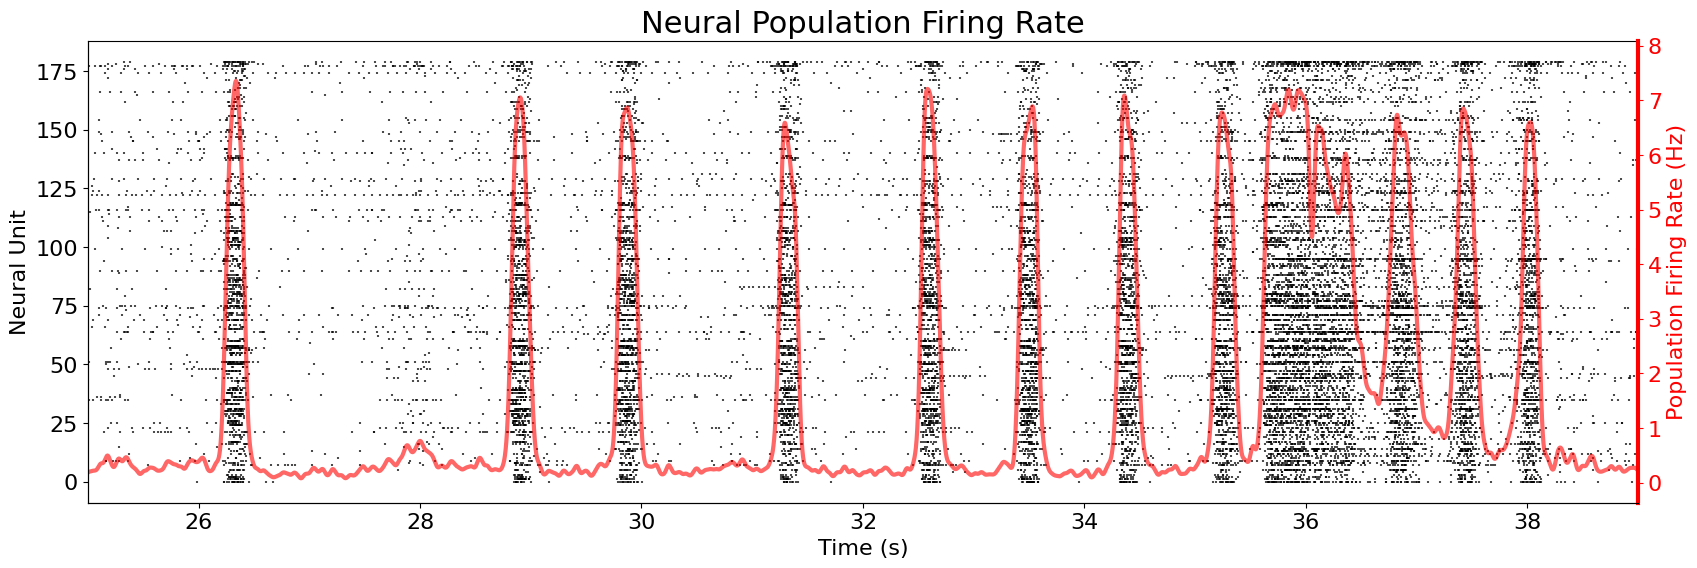

In [6]:
plot_raster(sd, xlim=(25,39), title="Neural Population Firing Rate",size=(20,6))

(<Axes: title={'center': 'Neural Population Firing Rate'}, xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

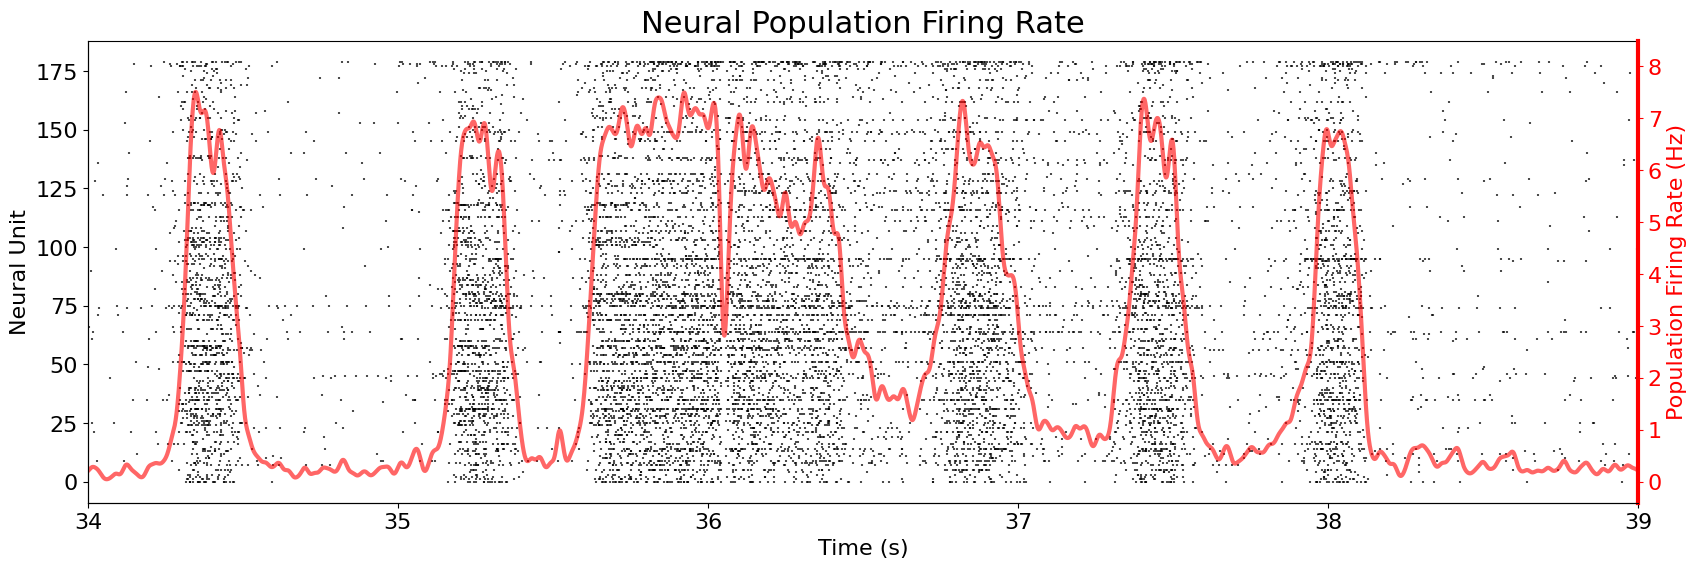

In [7]:
plot_raster(sd, xlim=(34,39), title="Neural Population Firing Rate",size=(20,6), smoothness=10)

In [8]:
data = get_brain_waves( data_raw["data"], data_raw["frame_rate"] )#[wave_type]  # get common brain waves


# Choose Electrode

**good electrodes:** 50

<font color="orange"> 
Pick an electrode near the center of where the oscilations are happening

(1000.0, 3200.0)

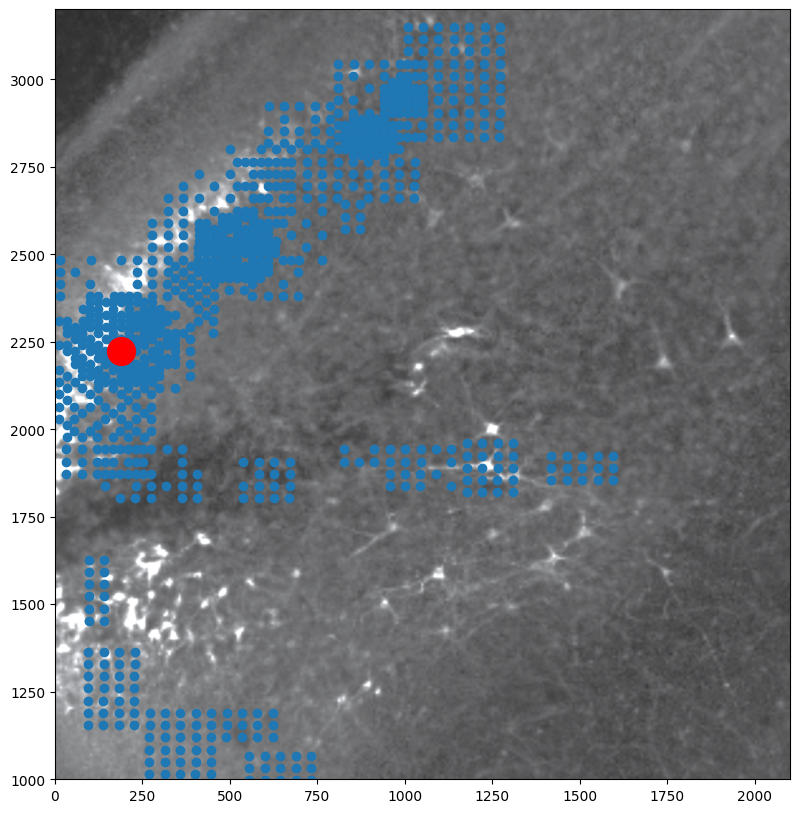

In [25]:
plt.figure(figsize=(15,10))
img = plt.imread("/workspaces/human_hippocampus/data/histology/chip21769_bw_rotated.png") 
plt.imshow(img,  extent=[0, 2100, 0, 3850])
plt.scatter( xy[:,0]/10,  xy[:,1] ) 
plt.scatter( xy[50,0]/10,  xy[50,1], color='red', s=400 ) 
plt.ylim(1000,3200)

# Firing rate Spectrogram

create spectrogram image

## electrode 50

In [27]:
power, times, frequencies, coif = cwt_spectrogram( data["basic"][50,:],  data_raw["frame_rate"], nNotes=12)

In [30]:
spectrogram_plot

<function human_hip.raw_data.spectrogram.spectrogram_plot(z, times, frequencies, coif, cmap='jet', norm=<matplotlib.colors.LogNorm object at 0x775cbc61ba60>, ax=None, colorbar=True)>

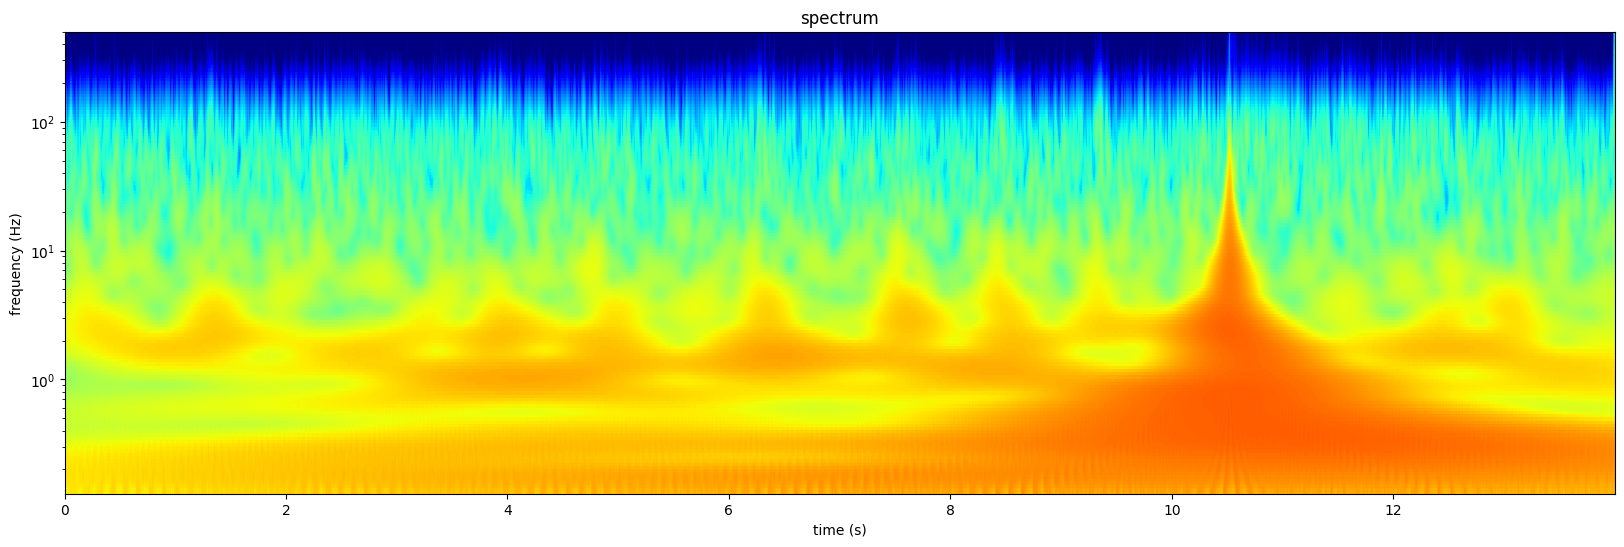

In [33]:
#print(i, channel,raw_trace.shape)
fig, axs = plt.subplots(1, 1, figsize=(20, 6))
spectrogram_plot(power, times, frequencies, coif, ax=axs, colorbar=False)

axs.set_title(f"spectrum", fontsize=12)
#axs.set_xlim(0, len(data1_lfp)/fs ) # code causes errors
#axs.set_ylim(0, 100)
axs.set_xlabel('time (s)')
axs.set_ylabel('frequency (Hz)')
axs.set_yscale('log')
#axs.set_ylim(1,120)
plt.show(block=False)

(<Axes: title={'center': 'Neural Population Firing Rate'}, xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

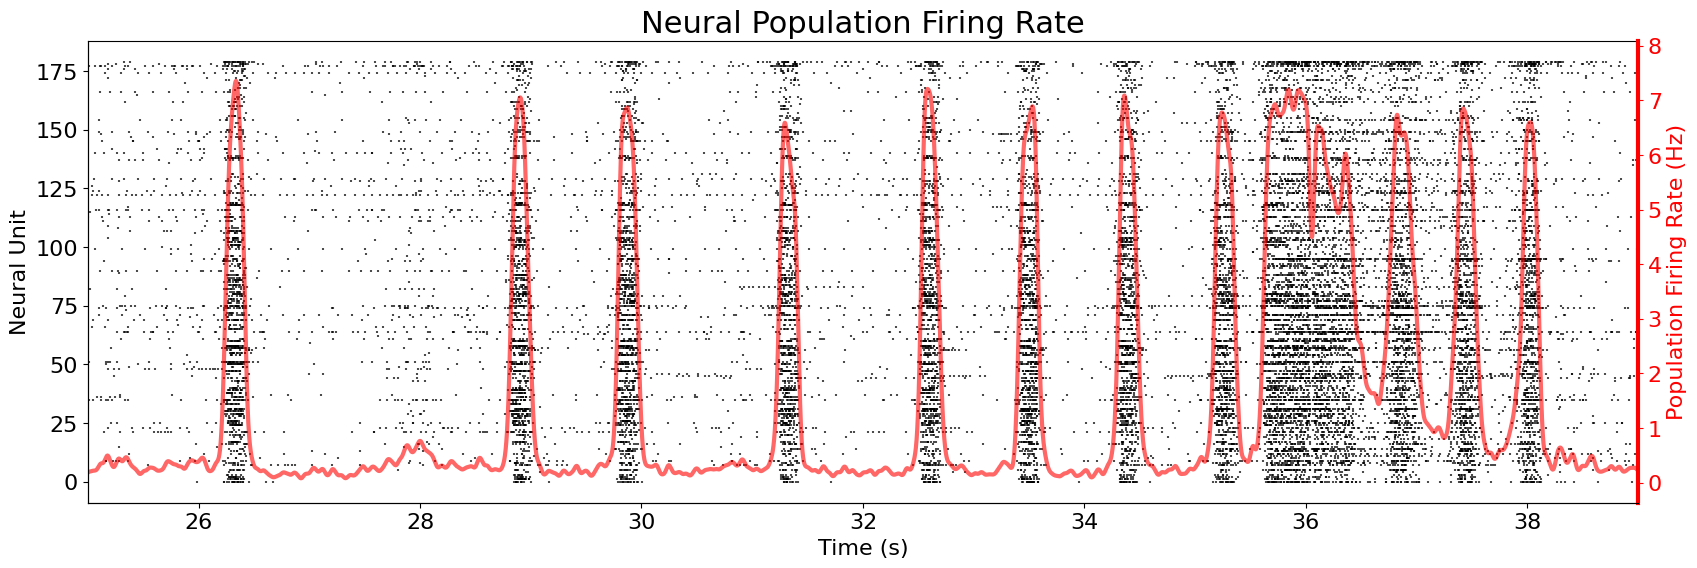

In [29]:
plot_raster(sd, xlim=(25,39), title="Neural Population Firing Rate",size=(20,6))

plot with firing rate

Text(0.5, 0, 'Time (s)')

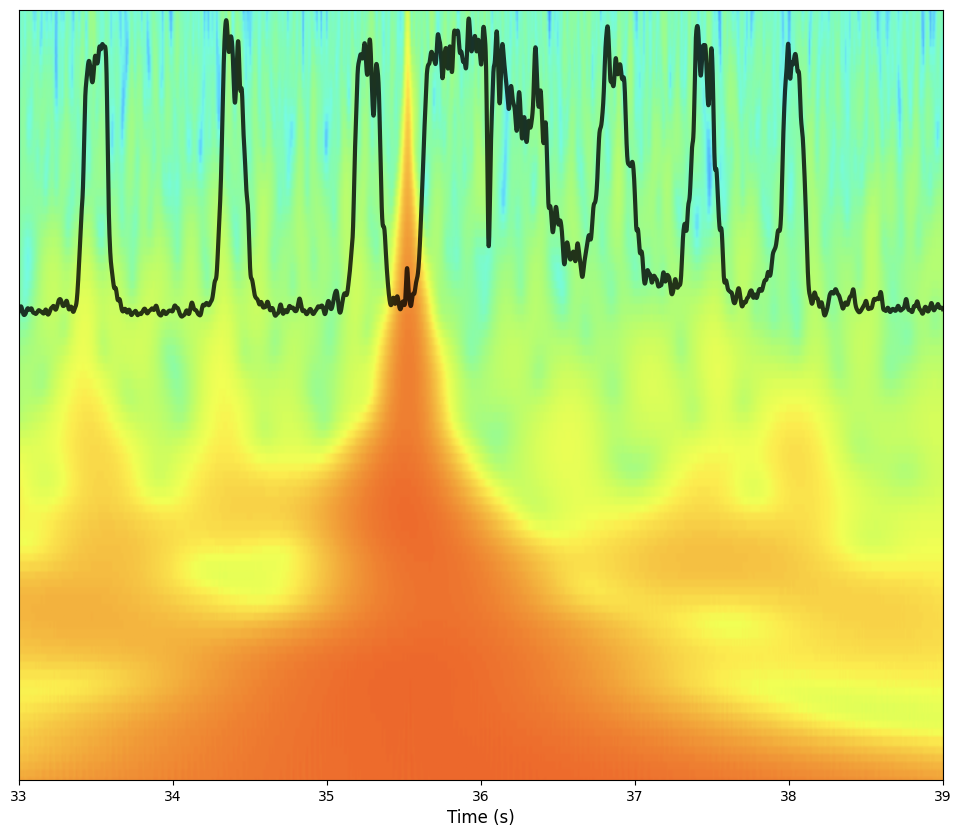

In [37]:
fig, axs =  plt.subplots(1, 1, figsize=(15, 10) )

pop_rate = sd.binned(bin_size=1)
pop_fr = gaussian_filter1d(pop_rate.astype(float), sigma=7)
bins = np.linspace(0, sd.length, pop_rate.shape[0] ) #/1000
plt.plot(bins/1000, pop_fr/4, color="black", linewidth=3, alpha=0.8)

# add title
#plt.title("Spectrogram with Neural Activity Overlay", fontsize=16)
img = plt.imread("seizure2_spectrogram_e50.png")      # Load in image
plt.imshow(img,  extent=[25, 39, -4, 3.7]) # Plot image, have it correspond to electrode dimensions

#plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions

plt.xlim(33,39)
plt.ylim(-3,2)

#axs.set_xticks([])
axs.set_yticks([])
axs.set_xlabel("Time (s)", fontsize=12)

# <font color="red"> OLD

## Electrode 30

good electrodes: 30

In [21]:
power, times, frequencies, coif = cwt_spectrogram( data["basic"][30,:],  data_raw["frame_rate"], nNotes=12)

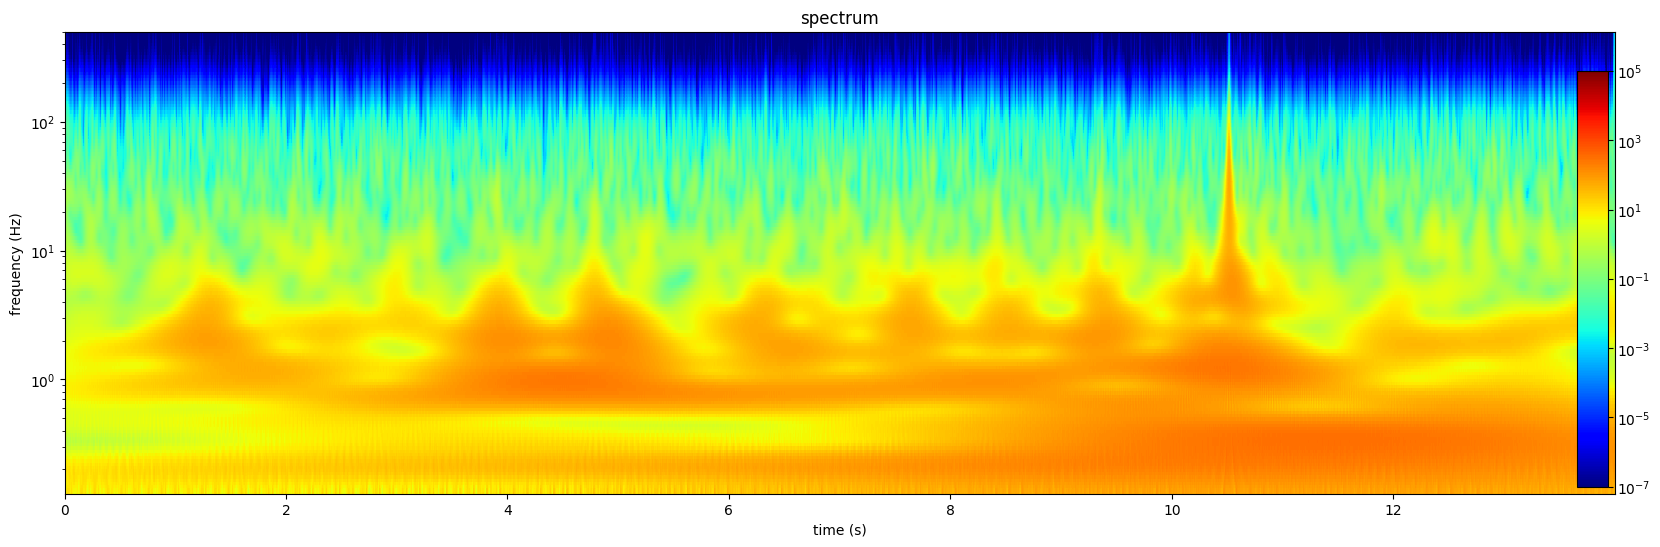

In [22]:
#print(i, channel,raw_trace.shape)
fig, axs = plt.subplots(1, 1, figsize=(20, 6))
spectrogram_plot(power, times, frequencies, coif, ax=axs)

axs.set_title(f"spectrum", fontsize=12)
#axs.set_xlim(0, len(data1_lfp)/fs ) # code causes errors
#axs.set_ylim(0, 100)
axs.set_xlabel('time (s)')
axs.set_ylabel('frequency (Hz)')
axs.set_yscale('log')
#axs.set_ylim(1,120)
plt.show(block=False)